In [52]:
import pandas as pd

In [53]:
df = pd.read_parquet("Others.parquet")
df[:5]

,HourDK,PriceArea,ExchangeNO_MWh,ExchangeSE_MWh,ExchangeGE_MWh,ExchangeNL_MWh,ExchangeGreatBelt_MWh,GrossConsumptionMWh,GridLossTransmissionMWh,GridLossInterconnectorsMWh,GridLossDistributionMWh,PowerToHeatMWh
HourUTC,,,,,,,,,,,,
2022-10-17 21:00:00,2022-10-17 23:00:00,DK1,1005.974182,719.114990,-1776.020020,-292.563995,-432.799988,2079.599609,105.699196,24.499001,77.213387,11.129756
2022-10-17 21:00:00,2022-10-17 23:00:00,DK2,0.000000,108.930748,-513.968018,0.000000,426.299988,1181.336548,28.738026,10.493000,50.237278,8.825370
2022-10-17 20:00:00,2022-10-17 22:00:00,DK1,802.278687,719.046021,-1696.410034,-337.079987,-346.500000,2189.069580,102.054878,25.374001,81.483292,2.690439
2022-10-17 20:00:00,2022-10-17 22:00:00,DK2,0.000000,99.104248,-332.307007,0.000000,341.600006,1255.846069,27.357729,5.682000,52.441071,2.297220
2022-10-17 19:00:00,2022-10-17 21:00:00,DK1,845.391785,719.203979,-1930.930054,-211.759003,-366.700012,2318.398682,109.719757,21.995001,86.542320,2.586312


In [54]:
df_wind = (
    df
    # .filter(regex="PriceArea|Wind")
    [["PriceArea","GrossConsumptionMWh"]]
    # .assign(
    #     WIND_PRODUCTION=lambda df: df.sum(axis='columns')
    # )
    .reset_index()
    .query("PriceArea == 'DK1'")
    .query("HourUTC >= '2017-01-01'")
)

df_wind[:2]

,HourUTC,PriceArea,GrossConsumptionMWh
0,2022-10-17 21:00:00,DK1,2079.599609
2,2022-10-17 20:00:00,DK1,2189.069580


In [55]:
# df = (
#     df
#     .groupby(
#         [
#             "PriceArea",
#             pd.Grouper(freq="M"),
#         ],
#         # as_index=False
#     )
#     .agg(
#         PRODUCTION=("TOTAL_PRODUCTION", "sum")
#     )
#     .reset_index()
#     .set_index("HourUTC")
# )
# df

In [56]:
# dk_1 = (
#     df
#     .query("PriceArea == 'DK1'")
#     .reset_index()
# )

# dk_2 = (
#     df
#     .query("PriceArea == 'DK2'")
#     .reset_index()
# )

In [57]:
# dk_2[:5]

In [58]:
df_wind_model = (
    df_wind
    .set_index("HourUTC") 
    .groupby(
        pd.Grouper(freq="D")
    )
    .agg(
        CONSUMPTION=("GrossConsumptionMWh", "sum")
    )
    # .rolling(30)
    # .mean()
    # .plot(figsize=(30,10))
    .reset_index()
)

In [59]:
from darts import TimeSeries

series = TimeSeries.from_dataframe(df_wind_model, "HourUTC", "CONSUMPTION")

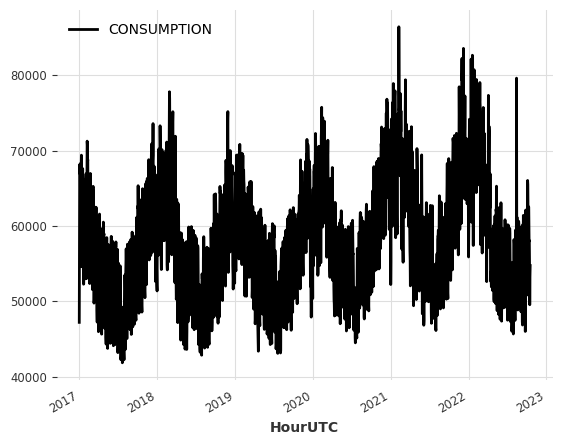

In [60]:
series.plot()

In [61]:
import matplotlib.pyplot as plt

NUM = 60

train, val = series[:-NUM], series[-NUM:]

In [62]:
# from statistics import mode
# from darts.models import ExponentialSmoothing

# model = ExponentialSmoothing()
# model.fit(train)

# prediction = model.predict(len(val), num_samples=100)

In [63]:


# plt.figure( figsize=(30,10))
# series.plot()
# prediction.plot(label="forecast", low_quantile=0.2, high_quantile=0.8)
# plt.legend()

In [64]:
from darts.models import Prophet

2022-10-30 11:37:03 prophet INFO: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2022-10-30 11:37:03 cmdstanpy DEBUG: input tempfile: /var/folders/qg/ync6f92s20134khj7nx8r_3m0000gn/T/tmpfjbv_1y3/jcqht_qr.json
2022-10-30 11:37:04 cmdstanpy DEBUG: input tempfile: /var/folders/qg/ync6f92s20134khj7nx8r_3m0000gn/T/tmpfjbv_1y3/lt8qnwu5.json
2022-10-30 11:37:04 cmdstanpy DEBUG: idx 0
2022-10-30 11:37:04 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-10-30 11:37:04 cmdstanpy DEBUG: CmdStan args: ['/Users/tk/miniconda3/envs/ml_energy/lib/python3.9/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56469', 'data', 'file=/var/folders/qg/ync6f92s20134khj7nx8r_3m0000gn/T/tmpfjbv_1y3/jcqht_qr.json', 'init=/var/folders/qg/ync6f92s20134khj7nx8r_3m0000gn/T/tmpfjbv_1y3/lt8qnwu5.json', 'output', 'file=/var/folders/qg/ync6f92s20134khj7nx8r_3m0000gn/T/tmpfjbv_1y3/prophet_model7mq0yxp9/prophet_model-20221030113704.csv', 'method=optimize', '

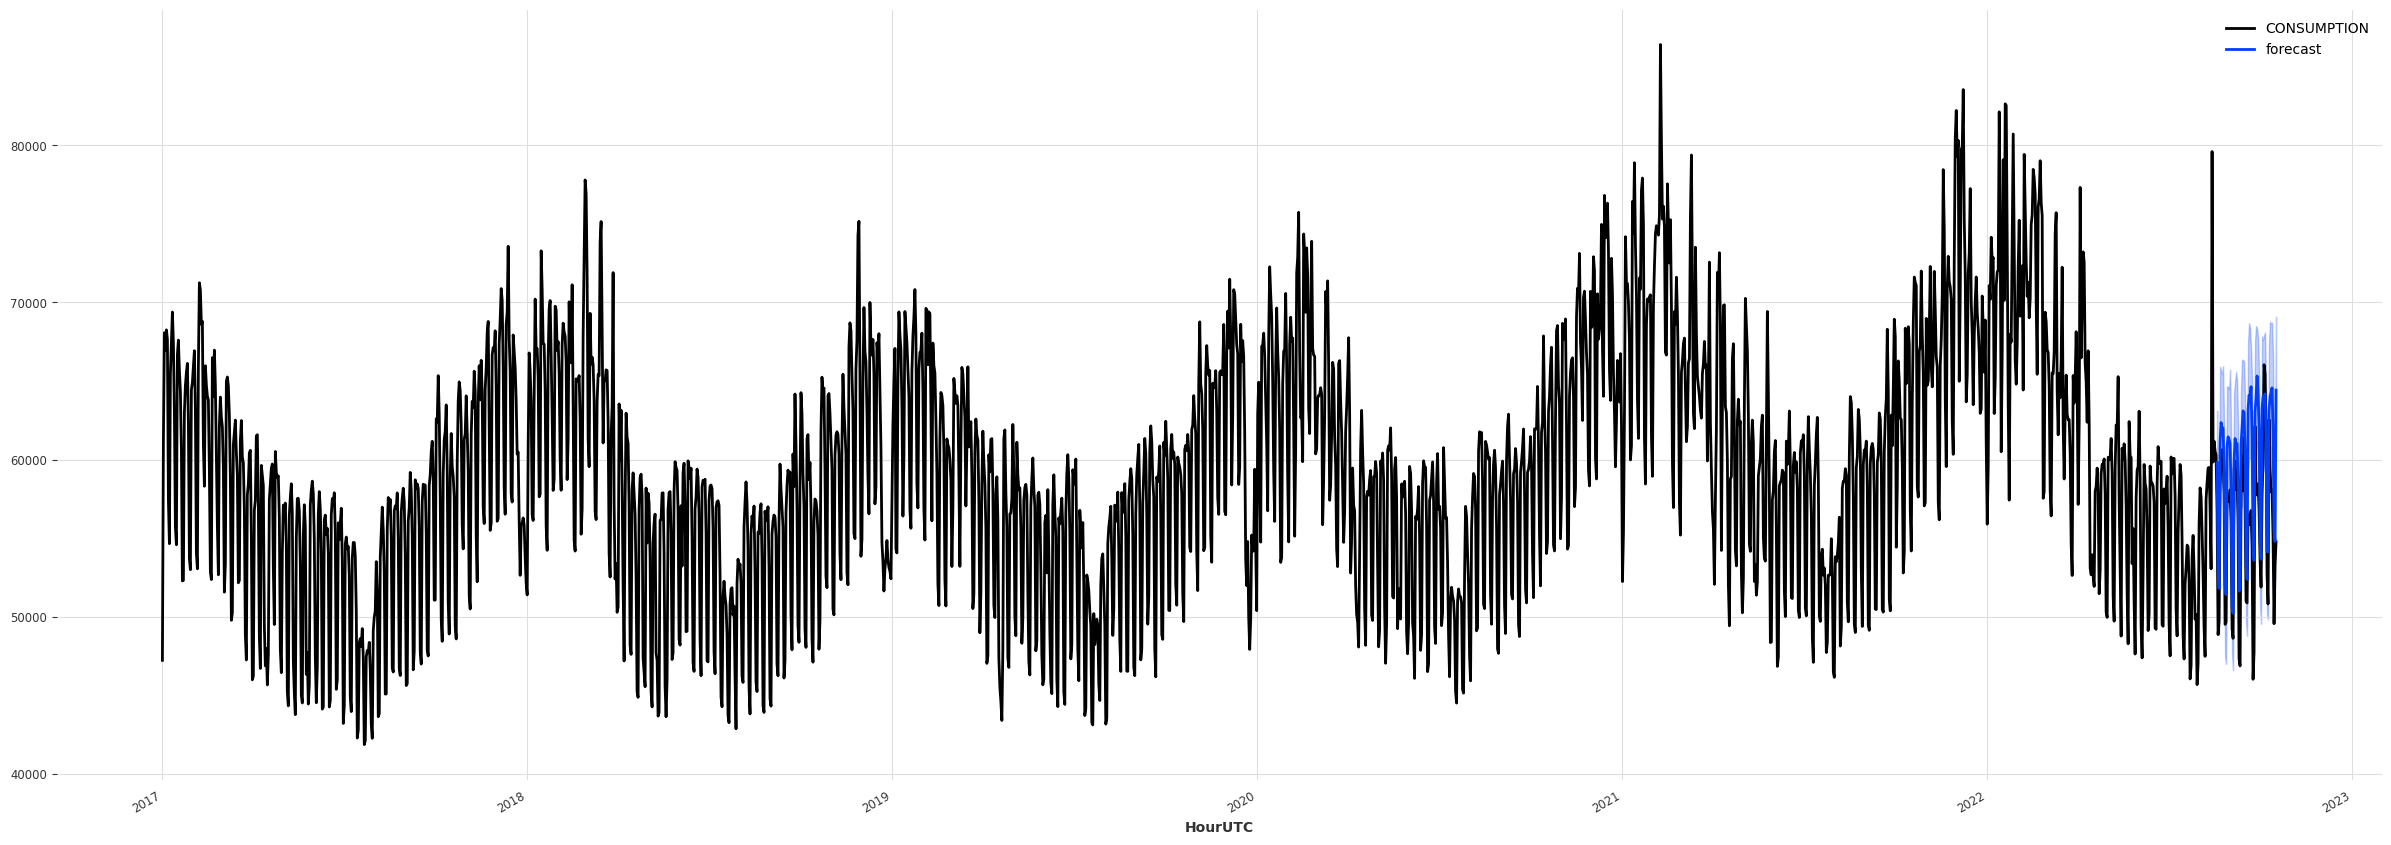

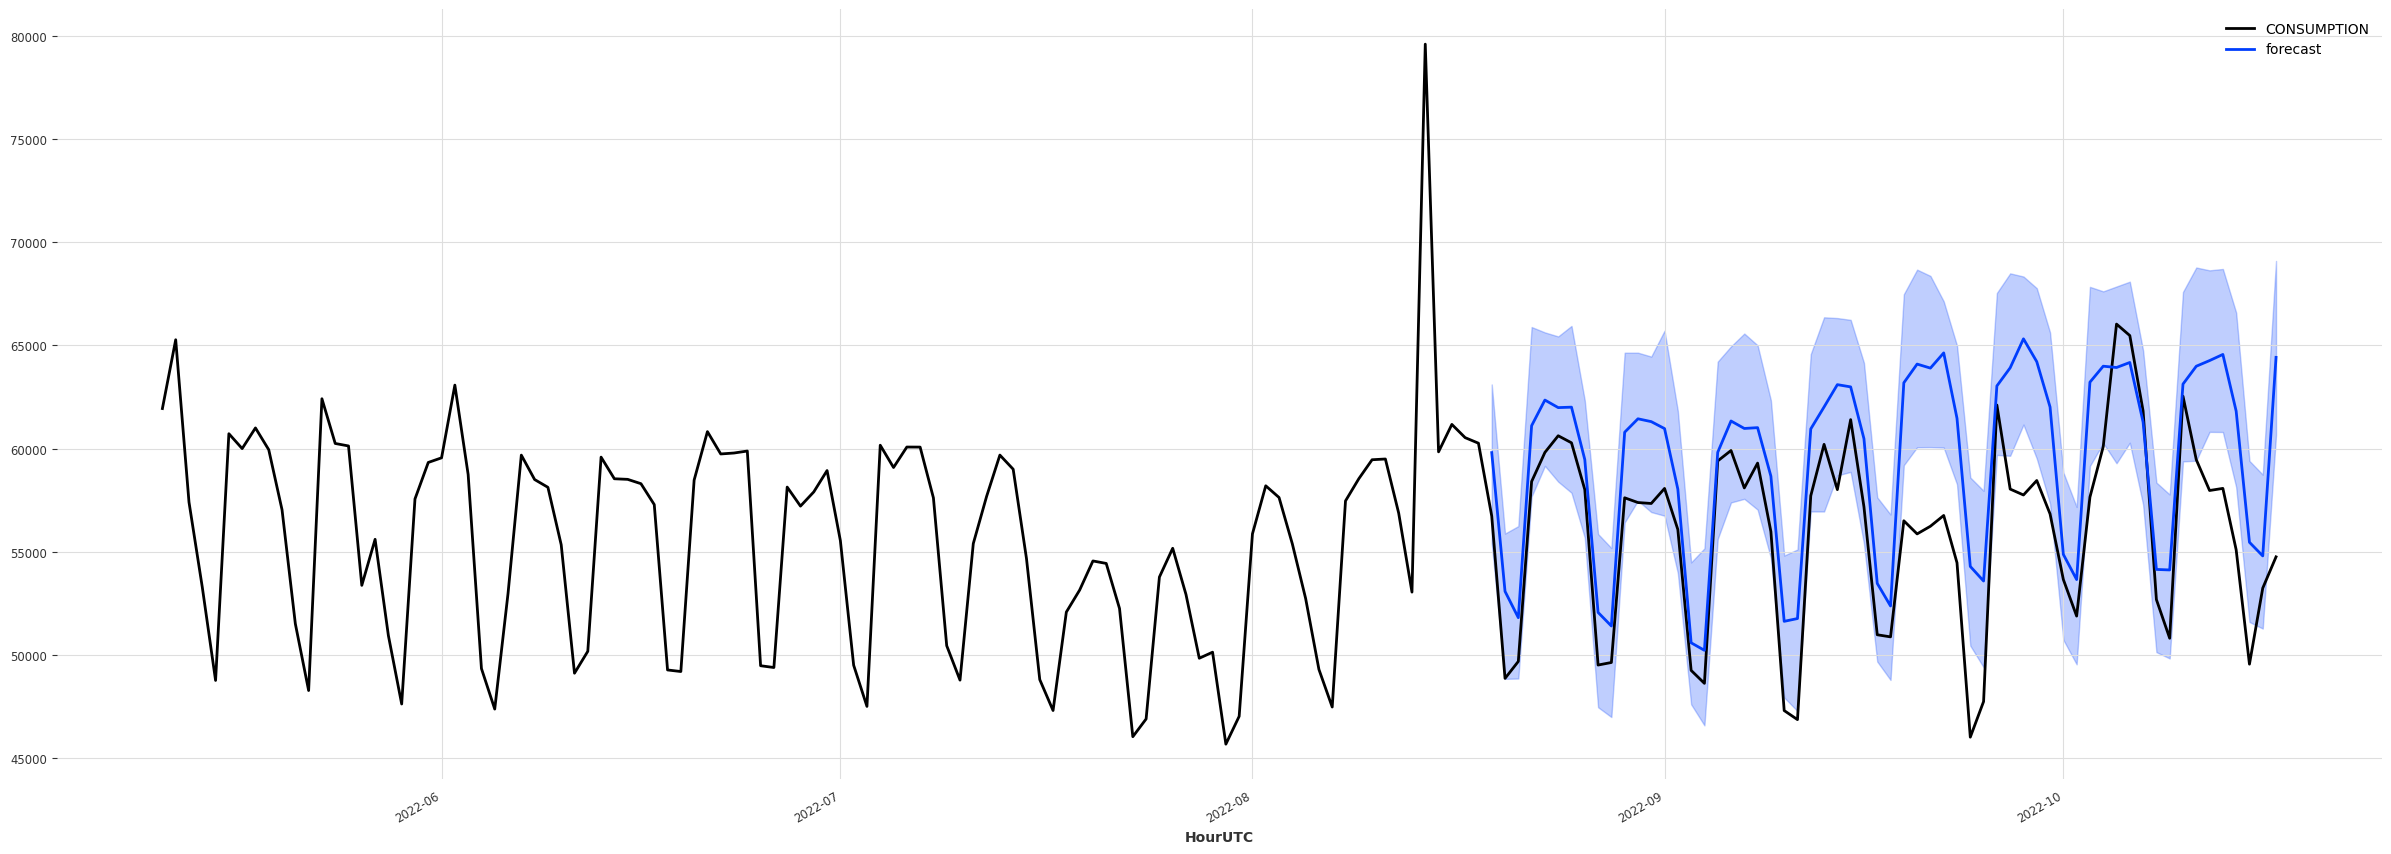

In [67]:
model = Prophet()
model.fit(train)


prediction = model.predict(NUM, num_samples=100)

plt.figure(figsize=(30,10))
series.plot()
prediction.plot(label="forecast", low_quantile=0.1, high_quantile=0.9)
plt.legend();



plt.figure(figsize=(30,10))
series[-(100 + NUM):].plot()
prediction[-(100 + NUM):].plot(label="forecast", low_quantile=0.1, high_quantile=0.9)
plt.legend();




In [71]:
model.save("prophet.pkl")

In [69]:
from prophet import Prophet

In [77]:
df_train = (
    df_wind_model.rename(columns={"HourUTC":"ds","CONSUMPTION":"y"})
)

df_train

,ds,y
0,2017-01-01,47228.768923
1,2017-01-02,61156.639037
2,2017-01-03,68069.768189
3,2017-01-04,66945.158937
4,2017-01-05,68251.829102
...,...,...
2111,2022-10-13,58075.284425
2112,2022-10-14,55100.657349
2113,2022-10-15,49560.262571
2114,2022-10-16,53244.419802


In [103]:
def weekend(ds):
    date = pd.to_datetime(ds)
    if date.weekday() in [5,6]:
        return 1
    return 0

df_train["weekend"] = df_train["ds"].apply(weekend)
df_train[:10]

,ds,y,weekend
0,2017-01-01,47228.768923,1
1,2017-01-02,61156.639037,0
2,2017-01-03,68069.768189,0
3,2017-01-04,66945.158937,0
4,2017-01-05,68251.829102,0
5,2017-01-06,67647.733395,0
6,2017-01-07,57451.096438,1
7,2017-01-08,54651.398559,1
8,2017-01-09,65507.273680,0
9,2017-01-10,67498.944577,0


In [104]:
m = Prophet()
m.add_regressor("weekend")
m.fit(df_train)

2022-10-30 11:51:08 prophet INFO: Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2022-10-30 11:51:08 cmdstanpy DEBUG: input tempfile: /var/folders/qg/ync6f92s20134khj7nx8r_3m0000gn/T/tmpfjbv_1y3/vaoh3lao.json
2022-10-30 11:51:08 cmdstanpy DEBUG: input tempfile: /var/folders/qg/ync6f92s20134khj7nx8r_3m0000gn/T/tmpfjbv_1y3/ldtqsd6q.json
2022-10-30 11:51:08 cmdstanpy DEBUG: idx 0
2022-10-30 11:51:08 cmdstanpy DEBUG: running CmdStan, num_threads: None
2022-10-30 11:51:08 cmdstanpy DEBUG: CmdStan args: ['/Users/tk/miniconda3/envs/ml_energy/lib/python3.9/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89417', 'data', 'file=/var/folders/qg/ync6f92s20134khj7nx8r_3m0000gn/T/tmpfjbv_1y3/vaoh3lao.json', 'init=/var/folders/qg/ync6f92s20134khj7nx8r_3m0000gn/T/tmpfjbv_1y3/ldtqsd6q.json', 'output', 'file=/var/folders/qg/ync6f92s20134khj7nx8r_3m0000gn/T/tmpfjbv_1y3/prophet_modelvwkere38/prophet_model-20221030115108.csv', 'method=optimize', '

In [105]:
future = m.make_future_dataframe(periods=90)

In [107]:
future["weekend"] = future["ds"].apply(weekend)

In [108]:
forecast = m.predict(future)

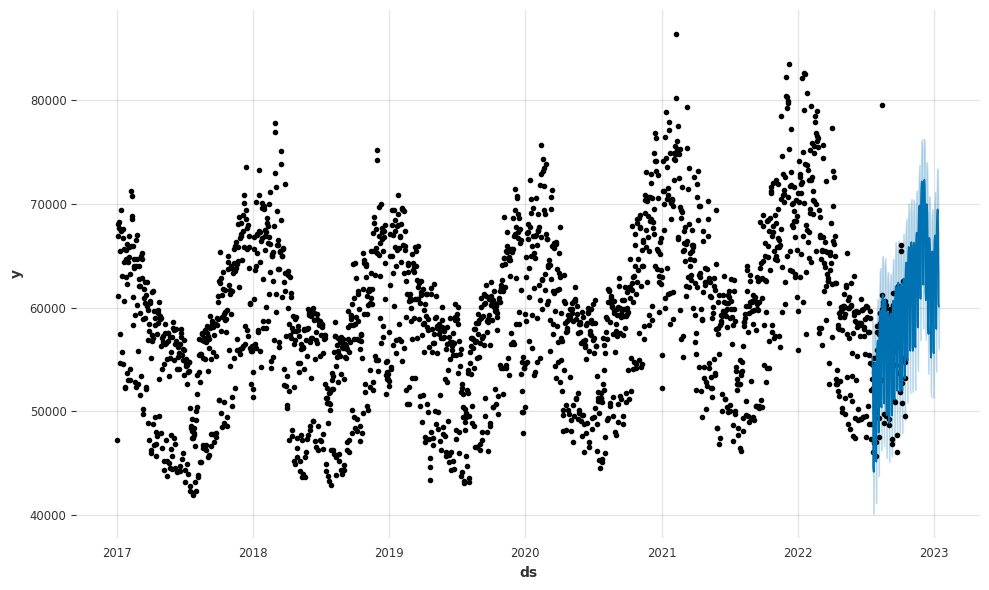

In [109]:
fig = m.plot(forecast[-180:])

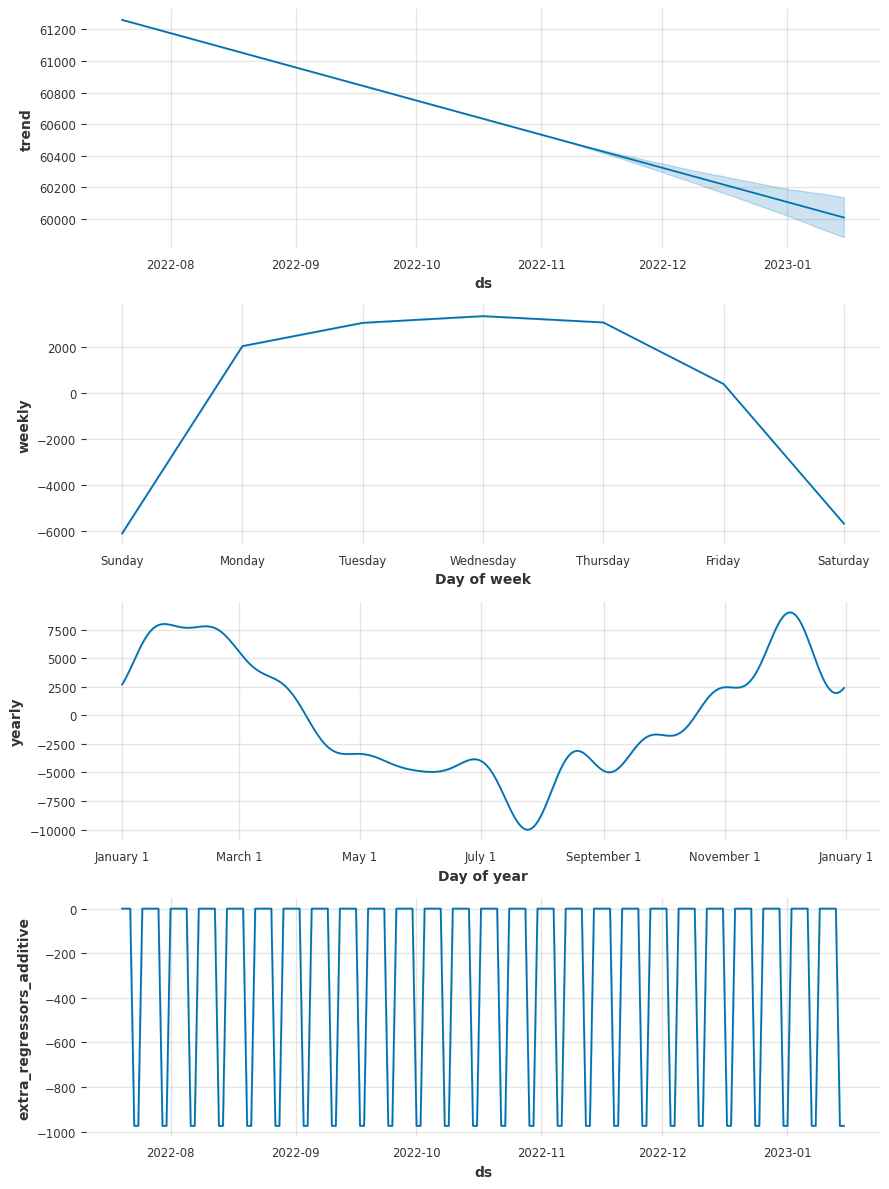

In [110]:
fig = m.plot_components(forecast[-180:])